In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
# Set the number of decimal places to 2 for Pandas DataFrames

#pd.options.display.float_format = '{:.2f}'.format


In [220]:
df = pd.read_csv('cars24.csv')

In [221]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [222]:
df.shape

(6019, 14)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [224]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [225]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6019.0,3009.000000,1737.679967,0.00,1504.5,3009.00,4513.50,6018.0
Year,6019.0,2013.358199,3.269742,1998.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.0,53000.00,73000.00,6500000.0
Seats,5977.0,5.278735,0.808840,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [226]:
df.describe(include='object').T

,count,unique,top,freq
Name,6019,1876,Mahindra XUV500 W8 2WD,49
Location,6019,11,Mumbai,790
Fuel_Type,6019,5,Diesel,3205
Transmission,6019,2,Manual,4299
Owner_Type,6019,4,First,4929
Mileage,6017,442,18.9 kmpl,172
Engine,5983,146,1197 CC,606
Power,5983,372,74 bhp,235
New_Price,824,540,95.13 Lakh,6


In [227]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [228]:
df.drop(columns=['Unnamed: 0','New_Price'],inplace=True)

In [229]:
df.shape

(6019, 12)

# Univariate Analysis

In [230]:
# numeric data - Year, Kilometers_Driven, Mileage, Engine, Power, Price

# Categorical data - Location, Fuel_Type, Transmission, Owner_Type, Seats 

## Numeric data - > Analysis & Cleaning

In [231]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50


In [232]:
# data cleaning

In [233]:
# Mileage 26.6 km/kg → 26.6

In [234]:
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype('float')

In [235]:
df['Mileage'].dtypes

dtype('float64')

In [236]:
# Engine 998 CC → 998.0

In [237]:
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype('float')

In [238]:
df['Engine'].head()

0     998.0
1    1582.0
2    1199.0
3    1248.0
4    1968.0
Name: Engine, dtype: float64

In [239]:
# Power

In [240]:
# df['Power'].unique()

In [241]:
df['Power'].replace(to_replace='null bhp', value=np.nan, inplace=True)

In [242]:
# 58.16 bhp → 58.16

In [243]:
df['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object

In [244]:
df['Power'] = df['Power'].str.split(expand=True)[0].astype('float')

In [245]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [246]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 564.4+ KB


In [248]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage,6017.0,18.134961,4.582289,0.00,15.17,18.15,21.10,33.54
Engine,5983.0,1621.276450,601.355233,72.00,1198.00,1493.00,1984.00,5998.00
Power,5876.0,113.253050,53.874957,34.20,75.00,97.70,138.10,560.00
Seats,5977.0,5.278735,0.808840,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


In [249]:
df['Seats'] = df['Seats'].astype('str')

In [250]:
num_col = df.select_dtypes(include='number').columns

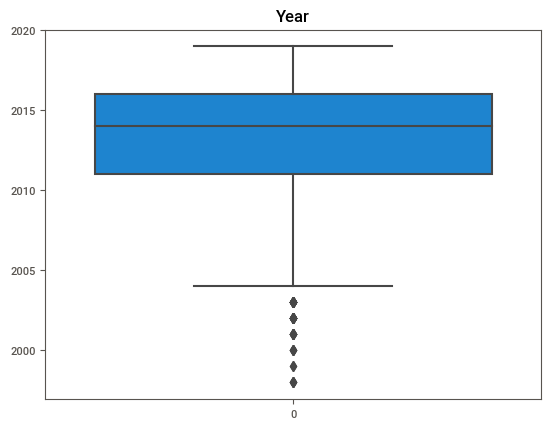

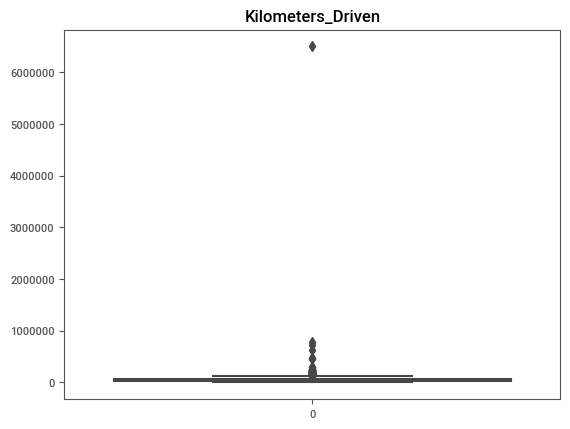

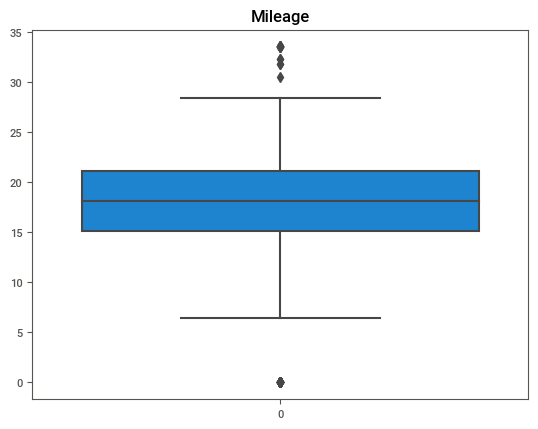

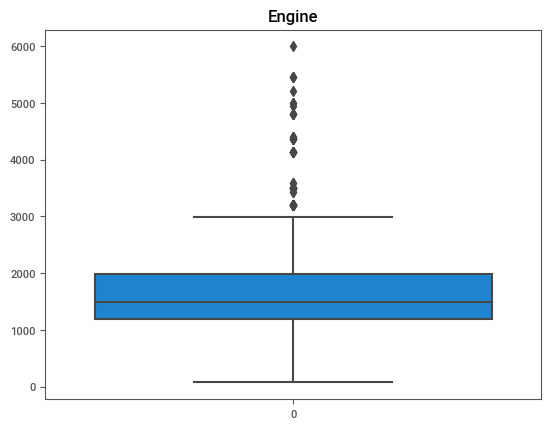

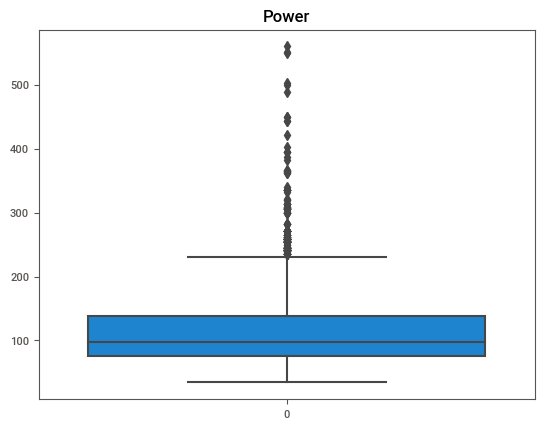

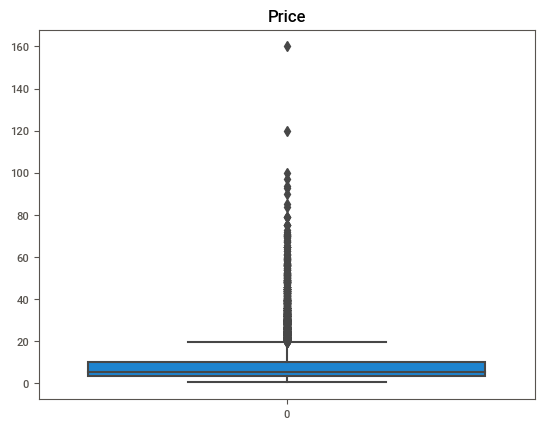

In [251]:
for i in num_col:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

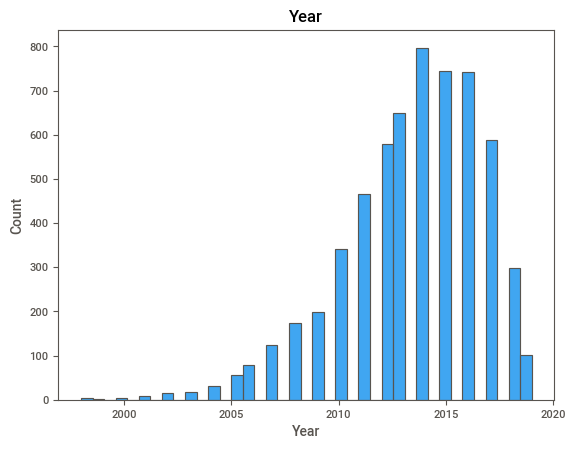

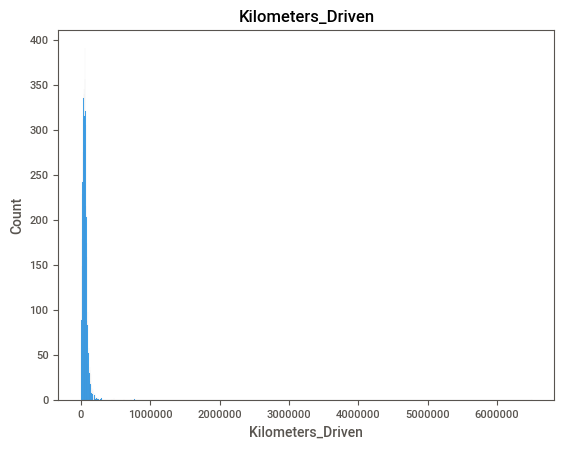

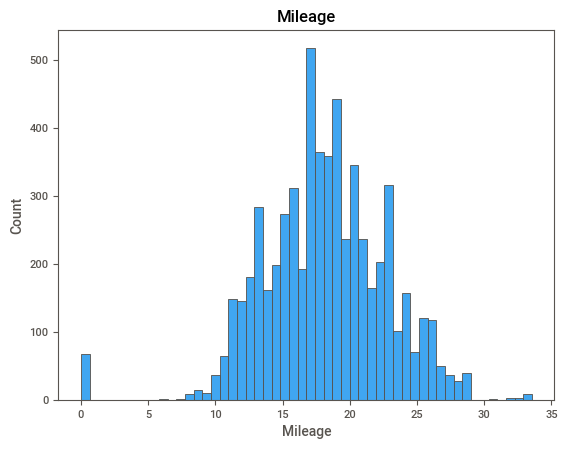

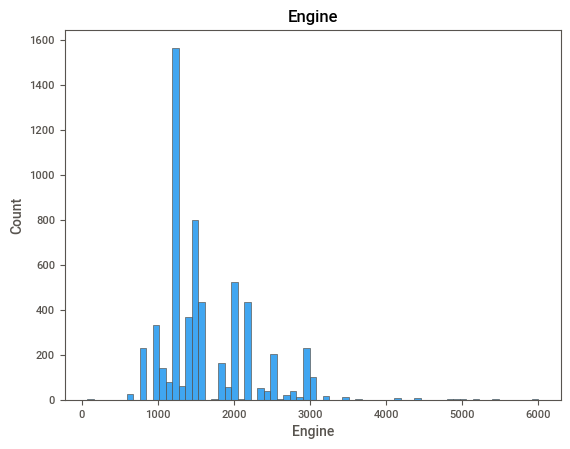

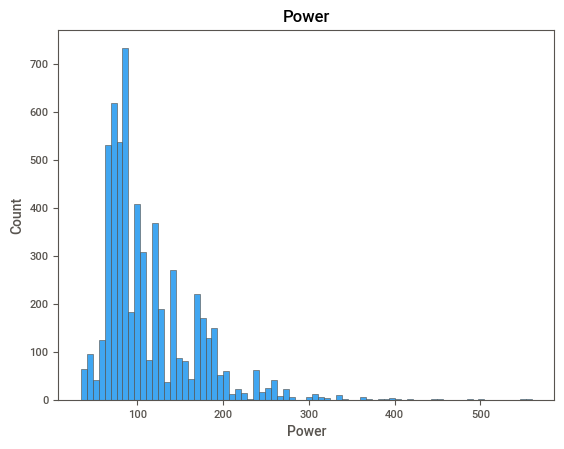

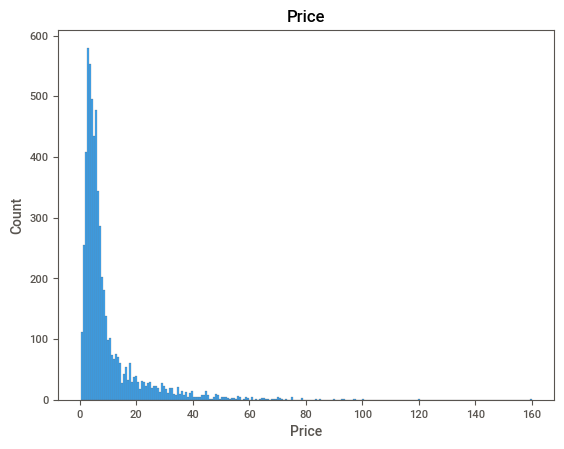

In [252]:
for i in num_col:
    sns.histplot(df[i])
    plt.title(i)
    plt.show()

In [253]:
# Kilometers_Driven

<AxesSubplot:xlabel='Kilometers_Driven'>

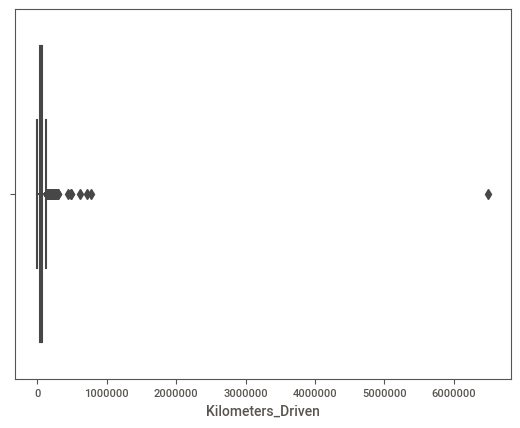

In [254]:
sns.boxplot(data=df, x='Kilometers_Driven')

In [255]:
df['Kilometers_Driven'].value_counts()

60000    82
45000    70
65000    68
50000    61
55000    60
         ..
28937     1
82085     1
68465     1
63854     1
27365     1
Name: Kilometers_Driven, Length: 3093, dtype: int64

In [256]:
df['Kilometers_Driven'].max()

6500000

In [257]:
df['Kilometers_Driven'].replace(to_replace=6500000, value=df['Kilometers_Driven'].median(), inplace=True)

<AxesSubplot:xlabel='Kilometers_Driven'>

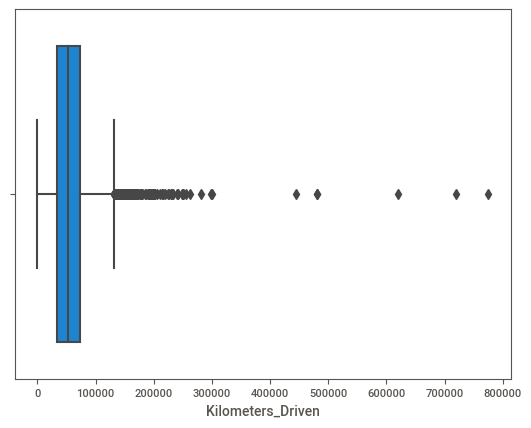

In [258]:
sns.boxplot(data=df, x='Kilometers_Driven')

In [259]:
#df.loc[df['Seats'] == 0, 'Seats'] = 5

In [260]:
df[df['Mileage'] == 0]['Name'].unique()

array(['Land Rover Freelander 2 TD4 SE',
       'Mercedes-Benz C-Class Progressive C 220d',
       'Hyundai Santro Xing XL', 'Honda City 1.5 GXI', 'Ford Figo Diesel',
       'Volkswagen Jetta 2007-2011 1.9 L TDI',
       'Hyundai Santro GLS I - Euro I',
       'Mercedes-Benz New C-Class Progressive C 200',
       'Hyundai Santro LS zipPlus', 'Hyundai Santro Xing XP',
       'Mercedes-Benz M-Class ML 350 4Matic',
       'Land Rover Range Rover 3.0 D', 'Smart Fortwo CDI AT',
       'Hyundai Santro Xing GL', 'Land Rover Freelander 2 TD4 S',
       'Hyundai Santro GLS I - Euro II', 'Maruti Baleno Vxi',
       'Land Rover Range Rover Sport 2005 2012 Sport',
       'Hyundai Santro DX', 'Mahindra Jeep MM 550 PE',
       'Hyundai Santro LP zipPlus', 'Toyota Qualis RS E2',
       'Hyundai Santro AT', 'Hyundai Santro GLS II - Euro II',
       'Skoda Superb 3.6 V6 FSI', 'Hyundai Santro GS',
       'Audi A7 2011-2015 Sportback',
       'Hyundai Santro GS zipDrive - Euro II', 'Fiat Siena 1.2 ELX',


In [261]:
car_with_no_mileage = df[df["Mileage"] == 0]["Name"].unique().tolist()

for car in car_with_no_mileage:
    print(car,'-', df[df['Name']== car]['Mileage'].max())
    print('-'*50)

Land Rover Freelander 2 TD4 SE - 0.0
--------------------------------------------------
Mercedes-Benz C-Class Progressive C 220d - 0.0
--------------------------------------------------
Hyundai Santro Xing XL - 0.0
--------------------------------------------------
Honda City 1.5 GXI - 12.8
--------------------------------------------------
Ford Figo Diesel - 0.0
--------------------------------------------------
Volkswagen Jetta 2007-2011 1.9 L TDI - 0.0
--------------------------------------------------
Hyundai Santro GLS I - Euro I - 0.0
--------------------------------------------------
Mercedes-Benz New C-Class Progressive C 200 - 0.0
--------------------------------------------------
Hyundai Santro LS zipPlus - 0.0
--------------------------------------------------
Hyundai Santro Xing XP - 0.0
--------------------------------------------------
Mercedes-Benz M-Class ML 350 4Matic - 0.0
--------------------------------------------------
Land Rover Range Rover 3.0 D - 0.0
----------

In [262]:
df[df["Mileage"] == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,NaN,5.0,1.30
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,NaN,NaN,nan,2.95
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,nan,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446.0,NaN,8.0,2.20
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,35.00
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,NaN,6.0,1.70
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,Manual,Second,0.0,1086.0,62.0,5.0,1.39


In [263]:
# car_with_no_mileage.sort()
# car_with_no_mileage

In [264]:
car_dict = {name:0 for name in car_with_no_mileage}

In [265]:
car_dict

{'Land Rover Freelander 2 TD4 SE': 0,
 'Mercedes-Benz C-Class Progressive C 220d': 0,
 'Hyundai Santro Xing XL': 0,
 'Honda City 1.5 GXI': 0,
 'Ford Figo Diesel': 0,
 'Volkswagen Jetta 2007-2011 1.9 L TDI': 0,
 'Hyundai Santro GLS I - Euro I': 0,
 'Mercedes-Benz New C-Class Progressive C 200': 0,
 'Hyundai Santro LS zipPlus': 0,
 'Hyundai Santro Xing XP': 0,
 'Mercedes-Benz M-Class ML 350 4Matic': 0,
 'Land Rover Range Rover 3.0 D': 0,
 'Smart Fortwo CDI AT': 0,
 'Hyundai Santro Xing GL': 0,
 'Land Rover Freelander 2 TD4 S': 0,
 'Hyundai Santro GLS I - Euro II': 0,
 'Maruti Baleno Vxi': 0,
 'Land Rover Range Rover Sport 2005 2012 Sport': 0,
 'Hyundai Santro DX': 0,
 'Mahindra Jeep MM 550 PE': 0,
 'Hyundai Santro LP zipPlus': 0,
 'Toyota Qualis RS E2': 0,
 'Hyundai Santro AT': 0,
 'Hyundai Santro GLS II - Euro II': 0,
 'Skoda Superb 3.6 V6 FSI': 0,
 'Hyundai Santro GS': 0,
 'Audi A7 2011-2015 Sportback': 0,
 'Hyundai Santro GS zipDrive - Euro II': 0,
 'Fiat Siena 1.2 ELX': 0,
 'Land Rov

In [266]:
car_dict['Audi A7 2011-2015 Sportback']= 13.88
car_dict['Fiat Siena 1.2 ELX']= 15.5
car_dict['Ford Figo Diesel']=25.5
car_dict['Honda City 1.5 GXI']= 12.8

car_dict['Hyundai Santro AT']= 20.3
car_dict['Hyundai Santro DX']= 20.3
car_dict['Hyundai Santro GLS I - Euro I']= 20.3
car_dict['Hyundai Santro GLS I - Euro II']= 20.3
car_dict['Hyundai Santro GLS II - Euro II']= 20.3
car_dict['Hyundai Santro GS']= 20.3
car_dict['Hyundai Santro GS zipDrive - Euro II']= 20.3
car_dict['Hyundai Santro LP - Euro II']= 20.3
car_dict['Hyundai Santro LP zipPlus']= 20
car_dict['Hyundai Santro LS zipPlus']= 20
car_dict['Hyundai Santro Xing GL']= 17.92
car_dict['Hyundai Santro Xing XL']= 17
car_dict['Hyundai Santro Xing XP']= 17.92

car_dict['Land Rover Freelander 2 TD4 SE']= 12.35
car_dict['Land Rover Freelander 2 TD4 S']= 12.35
car_dict['Land Rover Freelander 2 TD4 HSE']= 12.35
car_dict['Land Rover Range Rover 3.0 D']= 13.16
car_dict['Land Rover Range Rover Sport 2005 2012 Sport']= 22.8

car_dict['Mahindra Jeep MM 540 DP']= 10
car_dict['Mahindra Jeep MM 550 PE']= 10
car_dict['Maruti Baleno Vxi']= 12
car_dict['Mercedes-Benz C-Class Progressive C 220d']= 12.06
car_dict['Mercedes-Benz M-Class ML 350 4Matic']= 10
car_dict['Mercedes-Benz New C-Class Progressive C 200']= 14.49
car_dict['Skoda Superb 3.6 V6 FSI']= 6.6
car_dict['Smart Fortwo CDI AT']= 35.32
car_dict['Toyota Qualis Fleet A3']= 10
car_dict['Toyota Qualis RS E2']= 10
car_dict['Volkswagen Jetta 2007-2011 1.9 L TDI']= 15

In [267]:
#df[df['Name'].str.startswith('Land')]

In [268]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                  0
Price                  0
dtype: int64

In [269]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [270]:
df['Mileage'] = df['Name'].map(car_dict).combine_first(df['Mileage'])

In [271]:
# for index, row in df.iterrows():
#     car_name = row['Name']
#     if car_name in car_dict:
#         df.at[index, 'Mileage'] = car_dict[car_name]

In [272]:
df.dropna(subset=['Mileage'], inplace=True)

In [273]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                36
Power                143
Seats                  0
Price                  0
dtype: int64

In [274]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price
count,6017.000000,6017.000000,6017.00000,5981.000000,5874.000000,6017.000000
mean,2013.358152,57670.817849,18.31223,1621.505935,113.272203,9.478340
std,3.269967,37881.440048,4.19374,601.117630,53.873317,11.189605
min,1998.000000,171.000000,6.40000,624.000000,34.200000,0.440000
25%,2011.000000,34000.000000,15.29000,1198.000000,75.000000,3.500000
50%,2014.000000,53000.000000,18.19000,1493.000000,97.700000,5.640000
75%,2016.000000,73000.000000,21.10000,1984.000000,138.100000,9.950000
max,2019.000000,775000.000000,35.32000,5998.000000,560.000000,160.000000


In [275]:
df[df['Power'].isnull()]['Name'].unique().size

70

In [276]:
car_with_no_power = df[df['Power'].isnull()]['Name'].unique().tolist()

for car in car_with_no_power:
    print(car,'-', df[df['Name']== car]['Power'].max())
    print('-'*50)

Ford Fiesta 1.4 SXi TDCi - nan
--------------------------------------------------
Hyundai Santro Xing XL - nan
--------------------------------------------------
Hyundai Santro Xing XO - nan
--------------------------------------------------
Hyundai Santro Xing XL eRLX Euro III - nan
--------------------------------------------------
Hyundai Santro Xing XO eRLX Euro II - nan
--------------------------------------------------
Honda City 1.5 GXI - 100.0
--------------------------------------------------
Maruti Swift 1.3 VXi - nan
--------------------------------------------------
Maruti Swift VDI BSIV - 74.0
--------------------------------------------------
Volkswagen Jetta 2007-2011 1.9 L TDI - nan
--------------------------------------------------
Hyundai Santro GLS I - Euro I - nan
--------------------------------------------------
Ford Fiesta 1.6 SXI ABS Duratec - nan
--------------------------------------------------
Hyundai Santro LS zipPlus - nan
---------------------------------

In [277]:
car_names_with_null_power = df[df['Power'].isnull()]['Name']

# Display data associated with car names with null "Power" values
for car_name in car_names_with_null_power:
    associated_data = df[df['Name'] == car_name]
    if not associated_data.empty:
        print(f"Data for {car_name}:")
        print(associated_data.loc[::,['Name','Power']])
    else:
        print(f"No data found for {car_name} with null 'Power' value.")


Data for Ford Fiesta 1.4 SXi TDCi:
                          Name  Power
76    Ford Fiesta 1.4 SXi TDCi    NaN
3290  Ford Fiesta 1.4 SXi TDCi    NaN
Data for Hyundai Santro Xing XL:
                        Name  Power
79    Hyundai Santro Xing XL    NaN
262   Hyundai Santro Xing XL    NaN
307   Hyundai Santro Xing XL    NaN
1419  Hyundai Santro Xing XL    NaN
5426  Hyundai Santro Xing XL    NaN
Data for Hyundai Santro Xing XO:
                        Name  Power
89    Hyundai Santro Xing XO    NaN
575   Hyundai Santro Xing XO    NaN
748   Hyundai Santro Xing XO    NaN
3669  Hyundai Santro Xing XO    NaN
5861  Hyundai Santro Xing XO    NaN
Data for Hyundai Santro Xing XL eRLX Euro III:
                                      Name  Power
120   Hyundai Santro Xing XL eRLX Euro III    NaN
386   Hyundai Santro Xing XL eRLX Euro III    NaN
1153  Hyundai Santro Xing XL eRLX Euro III    NaN
4744  Hyundai Santro Xing XL eRLX Euro III    NaN
5228  Hyundai Santro Xing XL eRLX Euro III    NaN
5755  

Data for Toyota Etios GD:
                 Name  Power
366   Toyota Etios GD  67.05
934   Toyota Etios GD    NaN
2107  Toyota Etios GD  67.05
2262  Toyota Etios GD    NaN
2393  Toyota Etios GD    NaN
3247  Toyota Etios GD    NaN
3898  Toyota Etios GD    NaN
5985  Toyota Etios GD    NaN
Data for Toyota Etios Liva G:
                     Name  Power
829   Toyota Etios Liva G    NaN
2441  Toyota Etios Liva G    NaN
2936  Toyota Etios Liva G   78.9
3779  Toyota Etios Liva G   78.9
4156  Toyota Etios Liva G   78.9
Data for Tata Indica DLS:
                 Name  Power
648   Tata Indica DLS    NaN
2450  Tata Indica DLS    NaN
3589  Tata Indica DLS    NaN
Data for Maruti Swift VDI BSIV:
                       Name  Power
12    Maruti Swift VDI BSIV   74.0
227   Maruti Swift VDI BSIV    NaN
308   Maruti Swift VDI BSIV    NaN
332   Maruti Swift VDI BSIV   74.0
734   Maruti Swift VDI BSIV   74.0
739   Maruti Swift VDI BSIV    NaN
743   Maruti Swift VDI BSIV   74.0
1143  Maruti Swift VDI BSIV    

                 Name  Power
648   Tata Indica DLS    NaN
2450  Tata Indica DLS    NaN
3589  Tata Indica DLS    NaN
Data for Maruti Swift VDI BSIV W ABS:
                             Name  Power
2164  Maruti Swift VDI BSIV W ABS    NaN
3439  Maruti Swift VDI BSIV W ABS    NaN
3628  Maruti Swift VDI BSIV W ABS    NaN
3930  Maruti Swift VDI BSIV W ABS    NaN
5065  Maruti Swift VDI BSIV W ABS    NaN
Data for Honda CR-V Sport:
                  Name  Power
3638  Honda CR-V Sport    NaN
Data for Hyundai Santro Xing XP:
                        Name  Power
647   Hyundai Santro Xing XP    NaN
2597  Hyundai Santro Xing XP    NaN
3033  Hyundai Santro Xing XP    NaN
3645  Hyundai Santro Xing XP    NaN
5119  Hyundai Santro Xing XP    NaN
Data for Hyundai Santro Xing XO:
                        Name  Power
89    Hyundai Santro Xing XO    NaN
575   Hyundai Santro Xing XO    NaN
748   Hyundai Santro Xing XO    NaN
3669  Hyundai Santro Xing XO    NaN
5861  Hyundai Santro Xing XO    NaN
Data for Maruti

In [278]:
associated_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
366,Toyota Etios GD,Kolkata,2014,45000,Diesel,Manual,First,23.59,1364.0,67.05,5.0,3.25
934,Toyota Etios GD,Kolkata,2012,60000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,2.95
2107,Toyota Etios GD,Hyderabad,2015,116000,Diesel,Manual,Second,23.59,1364.0,67.05,5.0,5.80
2262,Toyota Etios GD,Bangalore,2012,58253,Diesel,Manual,Second,23.59,1364.0,NaN,5.0,4.45
2393,Toyota Etios GD,Chennai,2012,150000,Diesel,Manual,Third,23.59,1364.0,NaN,5.0,3.00
3247,Toyota Etios GD,Chennai,2011,79000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,4.67
3898,Toyota Etios GD,Coimbatore,2013,46496,Diesel,Manual,First,23.59,1364.0,NaN,5.0,5.30
5985,Toyota Etios GD,Delhi,2013,70000,Diesel,Manual,First,23.59,1364.0,NaN,5.0,3.88


In [279]:
def fill_missing_power(row):
    if pd.isna(row['Power']):
        # Find rows with the same car name
        similar_cars = df[df['Name'] == row['Name']]
        
        # Calculate the mean of available "Power" values for similar cars
        mean_power = similar_cars['Power'].mean()
        
        if not np.isnan(mean_power):
            return mean_power
    return row['Power']

In [280]:
df['Power'] =df.apply(fill_missing_power, axis=1)

In [281]:
df.describe(include='object').T

,count,unique,top,freq
Name,6017,1874,Mahindra XUV500 W8 2WD,49
Location,6017,11,Mumbai,789
Fuel_Type,6017,4,Diesel,3205
Transmission,6017,2,Manual,4299
Owner_Type,6017,4,First,4927
Seats,6017,10,5.0,5012


In [282]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                36
Power                113
Seats                  0
Price                  0
dtype: int64

In [283]:
df.dropna(subset=('Engine','Power'), inplace=True)

In [284]:
df.shape

(5899, 12)

## Plotting Numeric data

In [285]:
num_col = df.select_dtypes(include='number').columns
num_col

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price'], dtype='object')

Year


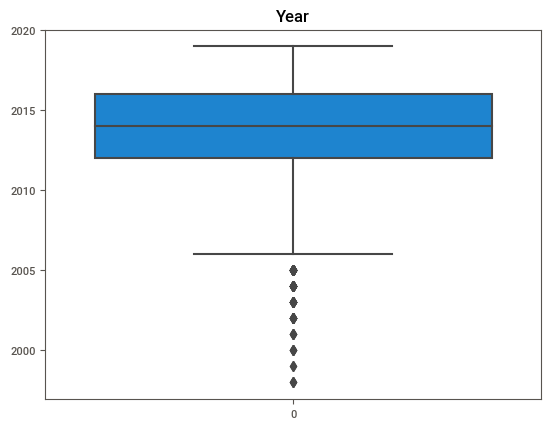

Kilometers_Driven


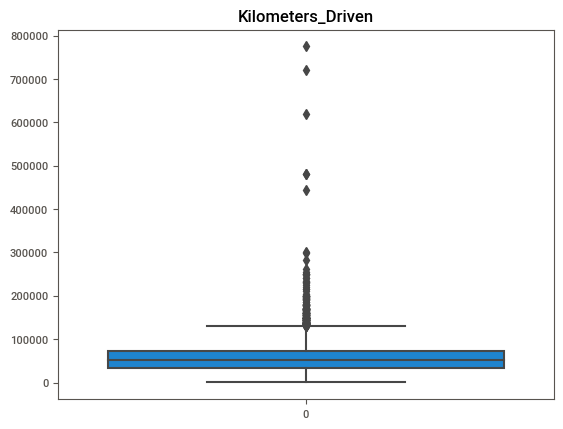

Mileage


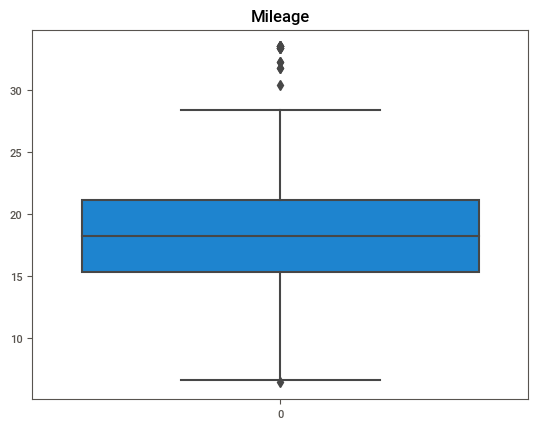

Engine


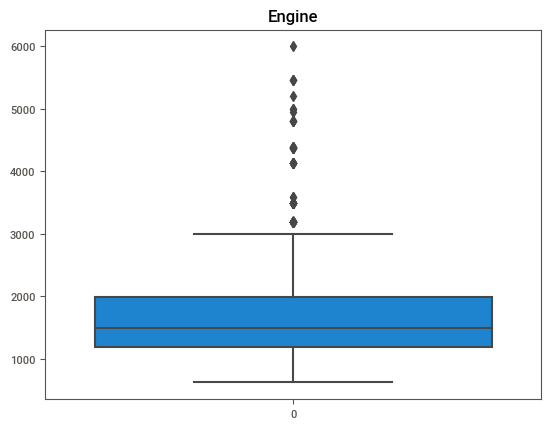

Power


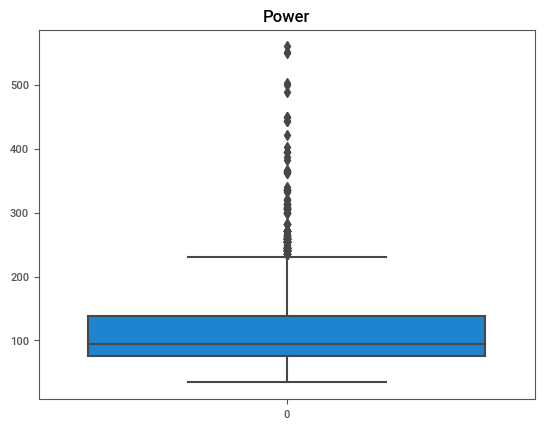

Price


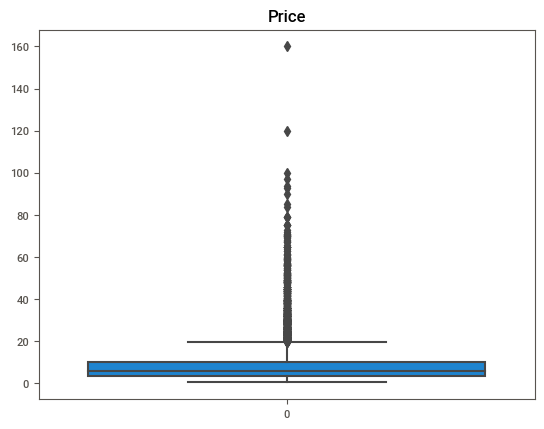

In [286]:
for col in num_col:
    print(col)
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

Year


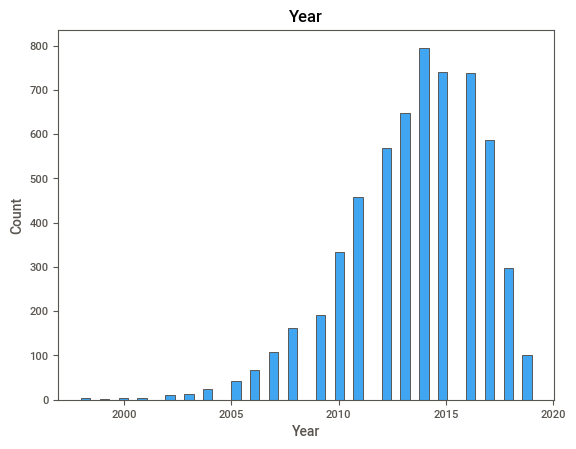

Kilometers_Driven


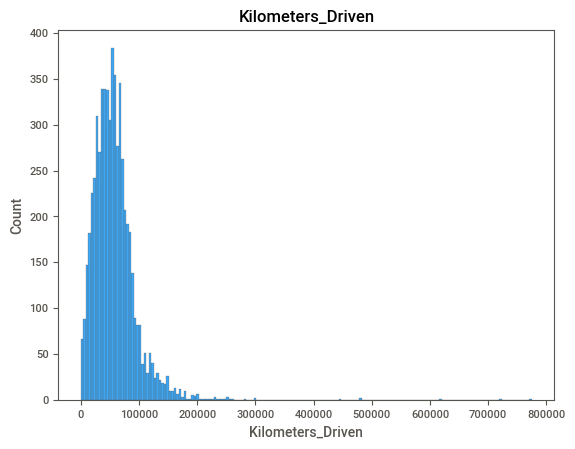

Mileage


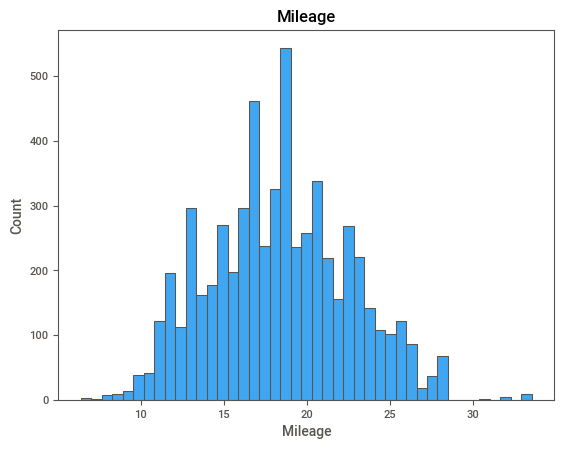

Engine


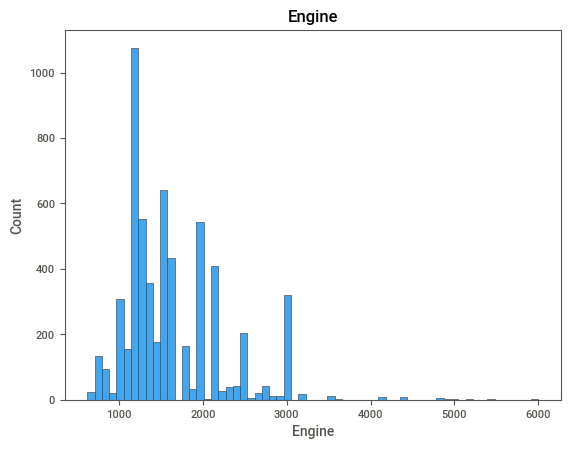

Power


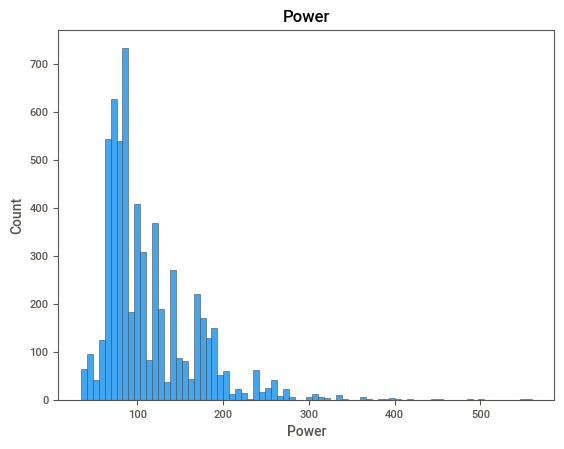

Price


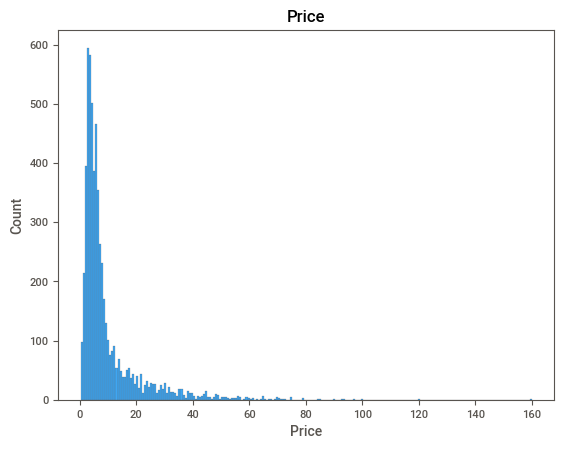

In [287]:
for col in num_col:
    print(col)
    sns.histplot(df[col])
    plt.title(col)
    plt.show()

## Categorical Data - Analysis & Cleaning

In [288]:
cat_col = df.select_dtypes(exclude='number').columns

In [289]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [290]:
for i in cat_col:
    print(i)
    print(df[i].value_counts())
    print('--------------------------------------')
    print()

Name
Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Maruti Swift Dzire VDI           34
Honda City 1.5 S MT              34
Maruti Swift VDI BSIV            31
                                 ..
Volvo S60 D4 SUMMUM               1
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1812, dtype: int64
--------------------------------------

Location
Mumbai        777
Hyderabad     721
Kochi         645
Coimbatore    631
Pune          598
Delhi         548
Kolkata       525
Chennai       479
Jaipur        403
Bangalore     352
Ahmedabad     220
Name: Location, dtype: int64
--------------------------------------

Fuel_Type
Diesel    3176
Petrol    2658
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64
--------------------------------------

Transmission
Manual       4197
Automatic    1702
Name: Transmission, dtype: int64
----------------------

In [291]:
df.Seats =df.Seats.astype('float')

In [292]:
df.loc[df['Seats'].isna(), 'Seats']= 5

In [293]:
df.Seats.value_counts()

5.0     4945
7.0      673
8.0      133
4.0       99
6.0       29
2.0       13
10.0       4
9.0        3
Name: Seats, dtype: int64

In [294]:
df.Seats =df.Seats.astype('str')

In [295]:
cat_col = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

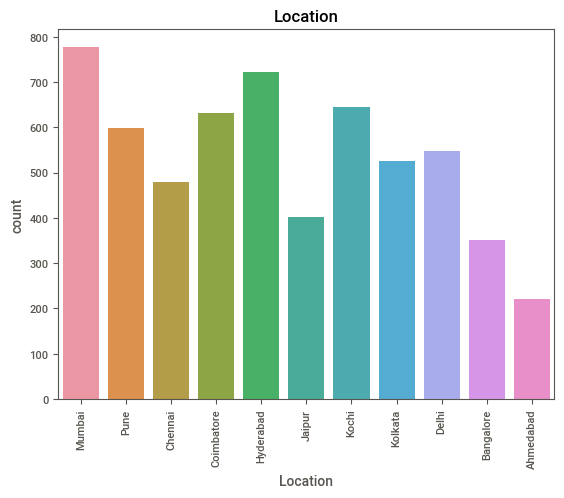

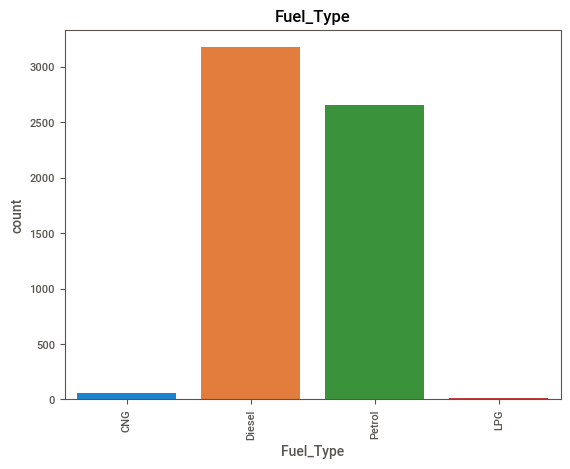

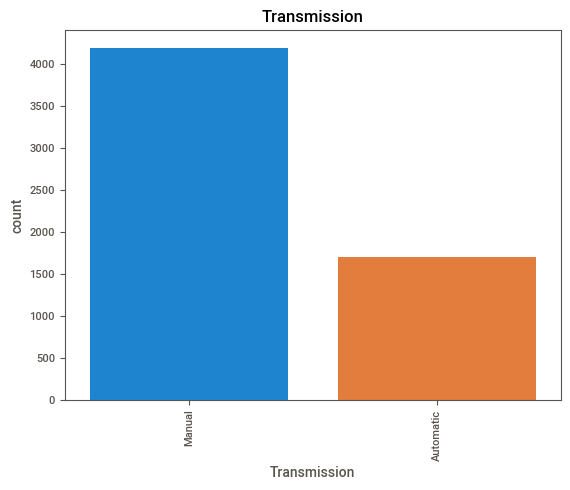

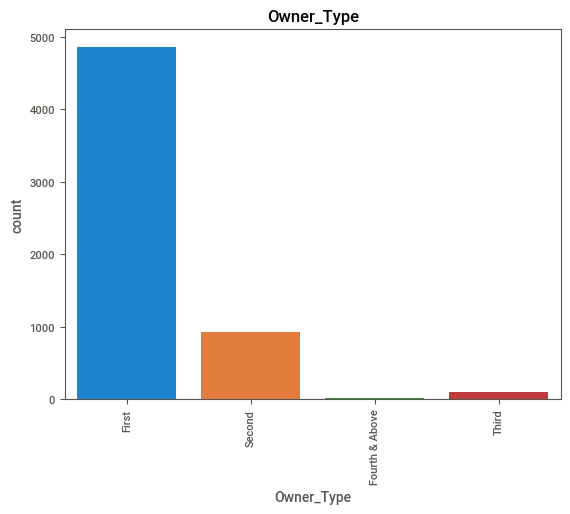

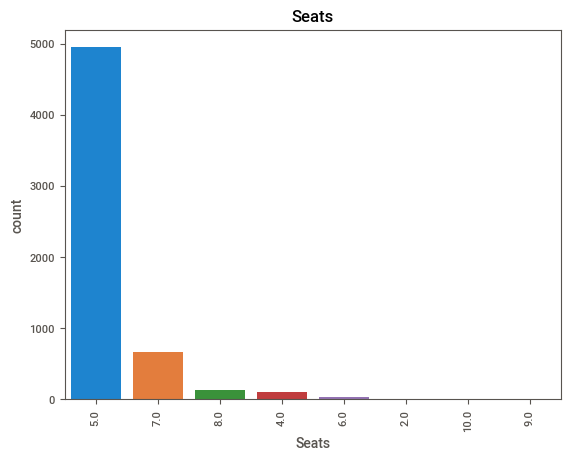

In [296]:
for i in cat_col:
    sns.countplot(x=i, data=df)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

In [297]:
df[cat_col].dtypes

Location        object
Fuel_Type       object
Transmission    object
Owner_Type      object
Seats           object
dtype: object

# Bivariate Analysis

In [298]:
df = df[df['Price'] <= 50]

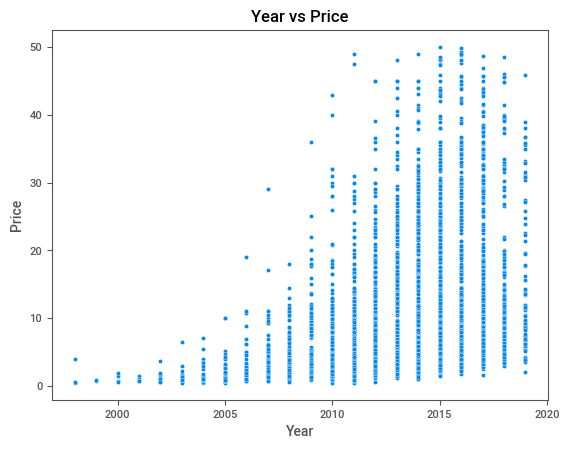

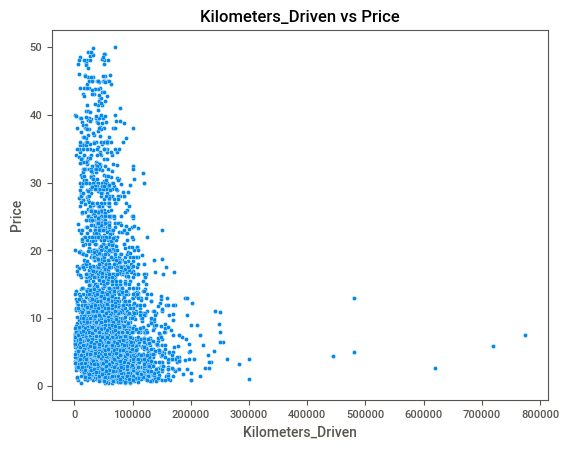

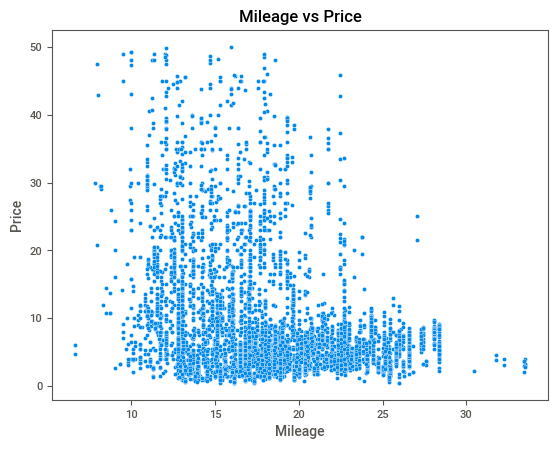

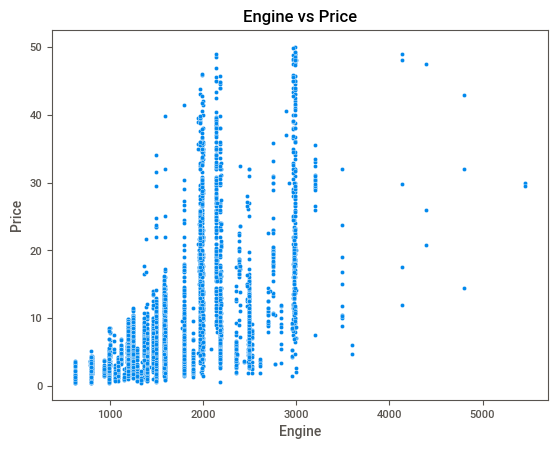

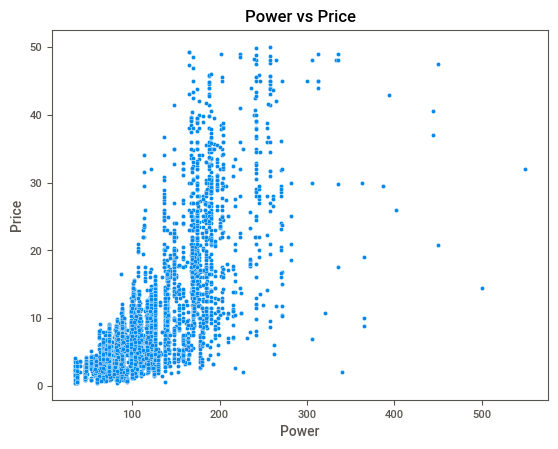

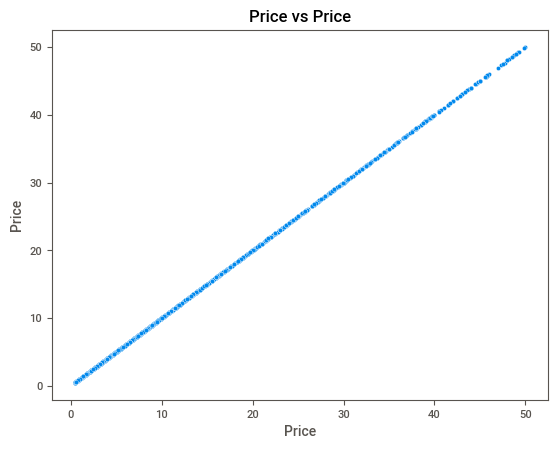

In [299]:
for i in num_col:
    sns.scatterplot(data=df, x=i,y='Price')
    plt.title('{} vs Price'.format(i))
    plt.show()

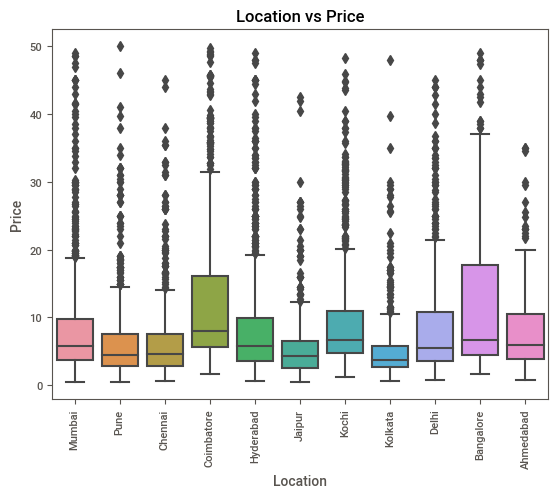

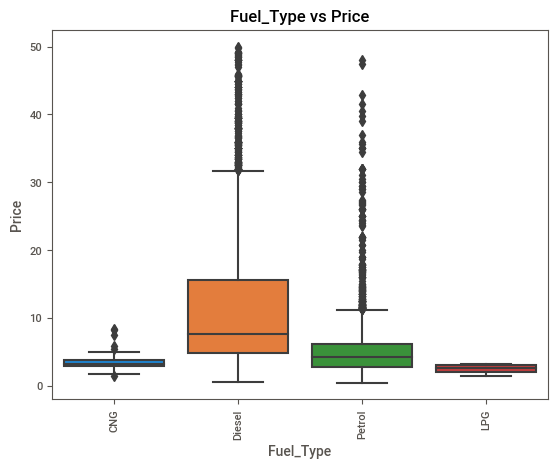

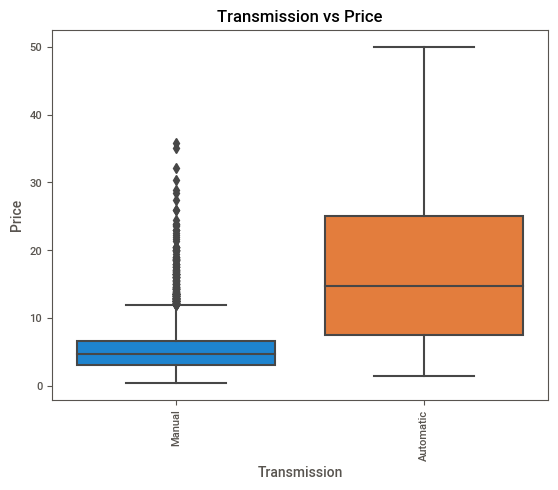

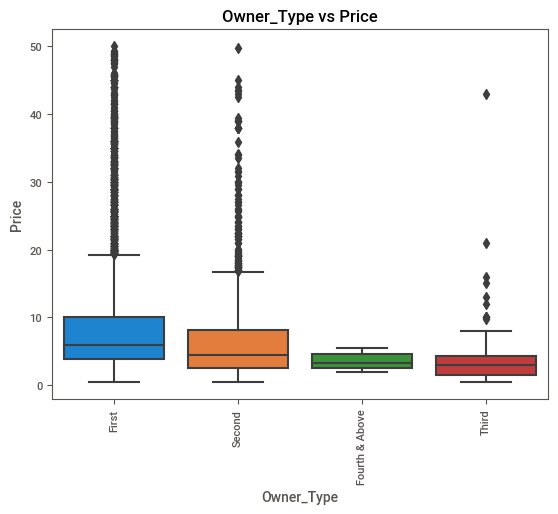

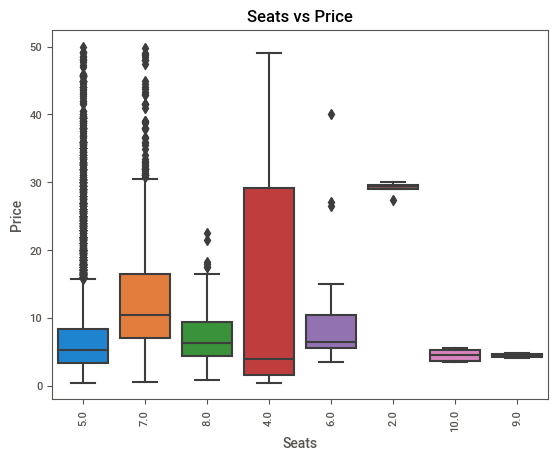

In [300]:
for i in cat_col:
    sns.boxplot(data=df, x=i,y='Price')
    plt.title('{} vs Price'.format(i))
    plt.xticks(rotation=90)
    plt.show()

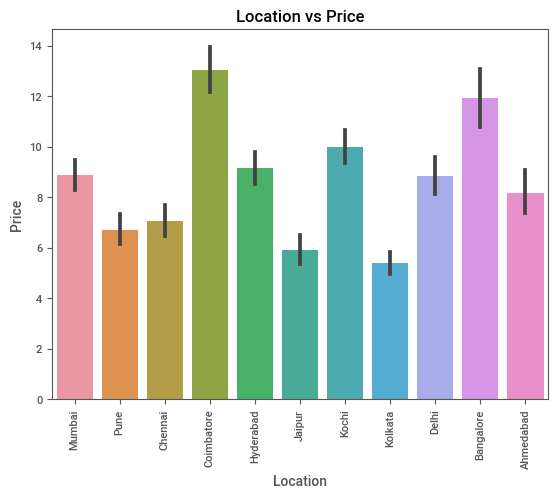

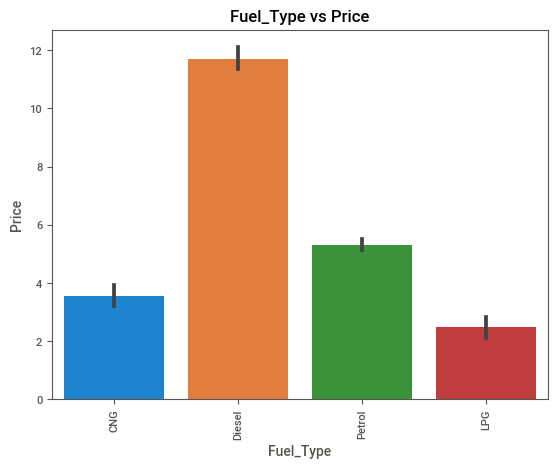

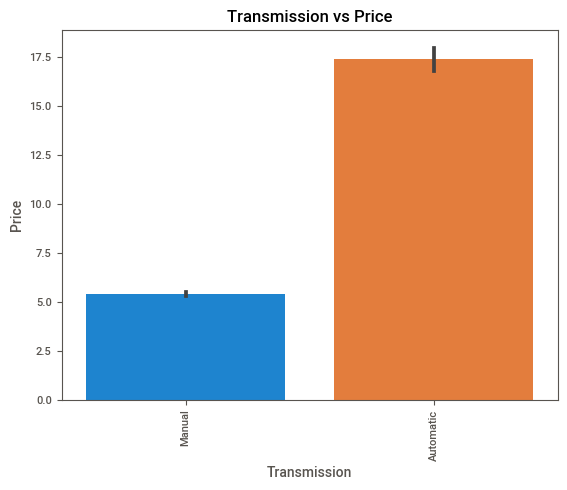

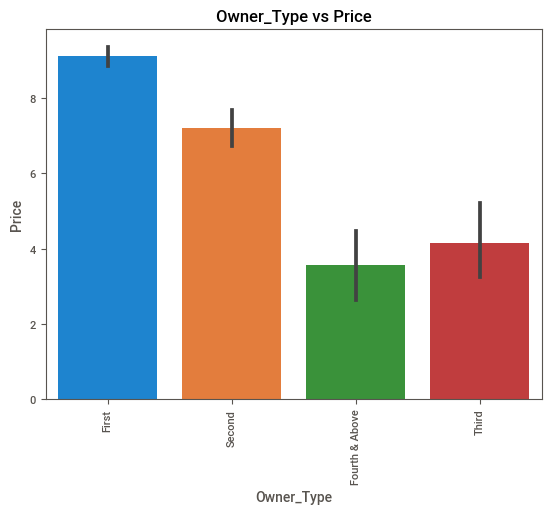

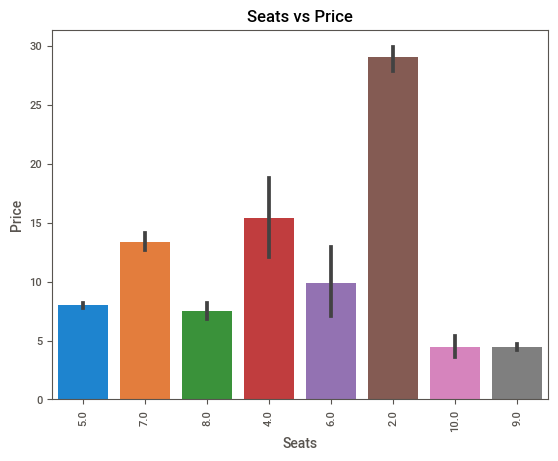

In [301]:
for i in cat_col:
    sns.barplot(data=df, x=i,y='Price')
    plt.title('{} vs Price'.format(i))
    plt.xticks(rotation=90)
    plt.show()

# Multivariate Analysis

<AxesSubplot:>

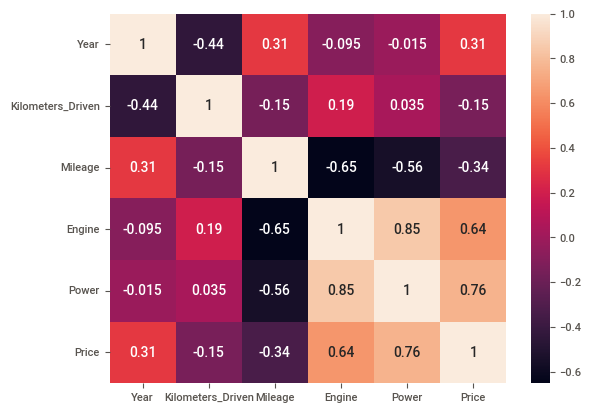

In [302]:
sns.heatmap(df[num_col].corr(), annot=True)

In [304]:
#df.to_csv('Cleaned_cars24.csv', index=False)

In [184]:
import sweetviz

In [185]:
viz = sweetviz.analyze(df, target_feat = 'Price')

C:\Users\Vishal\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\Vishal\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\Vishal\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\Vishal\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\Vishal\anaconda3\lib\site-packages\sweetviz\series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
C:\Users\Vishal\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.


In [186]:
viz.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
